In [1]:
#!pip install basedosdados


In [3]:
import numpy as np
import basedosdados as bd
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
query = """
SELECT *
FROM basedosdados.br_ibge_pam.lavoura_permanente
WHERE sigla_uf = 'PE'
"""

df = bd.read_sql(query, billing_project_id='eda-pam')

Downloading: 100%|██████████| 342608/342608 [00:17<00:00, 19379.05rows/s]


In [5]:
df


,ano,sigla_uf,id_municipio,produto,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,1991,PE,2600054,Uva,<NA>,<NA>,NaN,NaN,NaN
1,1991,PE,2600054,Palmito,<NA>,<NA>,NaN,NaN,NaN
2,1991,PE,2600054,Azeitona,<NA>,<NA>,NaN,NaN,NaN
3,1991,PE,2600054,Maçã,<NA>,<NA>,NaN,NaN,NaN
4,1991,PE,2600054,Café (em grão) Total,<NA>,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
342603,1992,PE,2616506,Dendê (cacho de coco),<NA>,<NA>,NaN,NaN,NaN
342604,1992,PE,2616506,Castanha de caju,<NA>,<NA>,NaN,NaN,NaN
342605,1992,PE,2616506,Abacate,<NA>,<NA>,NaN,NaN,NaN
342606,1992,PE,2616506,Maçã,<NA>,<NA>,NaN,NaN,NaN


In [6]:
df.shape

(342608, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342608 entries, 0 to 342607
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano                        342608 non-null  Int64  
 1   sigla_uf                   342608 non-null  object 
 2   id_municipio               342608 non-null  object 
 3   produto                    342608 non-null  object 
 4   area_destinada_colheita    24476 non-null   Int64  
 5   area_colhida               36558 non-null   Int64  
 6   quantidade_produzida       36558 non-null   float64
 7   rendimento_medio_producao  36535 non-null   float64
 8   valor_producao             36548 non-null   float64
dtypes: Int64(3), float64(3), object(3)
memory usage: 24.5+ MB


In [8]:
df.isnull().sum()

,0
ano,0
sigla_uf,0
id_municipio,0
produto,0
area_destinada_colheita,318132
area_colhida,306050
quantidade_produzida,306050
rendimento_medio_producao,306073
valor_producao,306060


In [9]:
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'produto', 'area_destinada_colheita',
       'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao',
       'valor_producao'],
      dtype='object')

In [10]:
df.head(20)

,ano,sigla_uf,id_municipio,produto,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,1991,PE,2600054,Uva,<NA>,<NA>,NaN,NaN,NaN
1,1991,PE,2600054,Palmito,<NA>,<NA>,NaN,NaN,NaN
2,1991,PE,2600054,Azeitona,<NA>,<NA>,NaN,NaN,NaN
3,1991,PE,2600054,Maçã,<NA>,<NA>,NaN,NaN,NaN
4,1991,PE,2600054,Café (em grão) Total,<NA>,<NA>,NaN,NaN,NaN
5,1991,PE,2600054,Abacate,<NA>,<NA>,NaN,NaN,NaN
6,1991,PE,2600054,Guaraná (semente),<NA>,<NA>,NaN,NaN,NaN
7,1991,PE,2600054,Urucum (semente),<NA>,<NA>,NaN,NaN,NaN
8,1991,PE,2600054,Borracha (látex coagulado),<NA>,<NA>,NaN,NaN,NaN
9,1991,PE,2600054,Maracujá,<NA>,<NA>,NaN,NaN,NaN


In [11]:
df.describe()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
count,342608.0,24476.0,36558.0,36558.000000,36535.000000,3.654800e+04
mean,1998.0,130.355369,162.747716,1364.844117,13030.916465,8.613731e+02
std,14.142156,545.694524,784.786828,8800.470101,16792.906560,1.593102e+04
min,1974.0,1.0,0.0,0.000000,5.000000,0.000000e+00
25%,1986.0,5.0,5.0,26.000000,3000.000000,0.000000e+00
50%,1998.0,12.0,14.0,98.000000,8000.000000,2.000000e+00
75%,2010.0,50.0,50.0,420.000000,15500.000000,3.100000e+01
max,2022.0,16800.0,21177.0,369000.000000,248000.000000,1.189595e+06


In [12]:
df['produto'].nunique()

38

In [13]:
df['produto'].unique()

array(['Uva', 'Palmito', 'Azeitona', 'Maçã', 'Café (em grão) Total',
       'Abacate', 'Guaraná (semente)', 'Urucum (semente)',
       'Borracha (látex coagulado)', 'Maracujá', 'Marmelo',
       'Erva-mate (folha verde)', 'Noz (fruto seco)',
       'Cacau (em amêndoa)', 'Café (em grão) Arábica', 'Pera', 'Limão',
       'Algodão arbóreo (em caroço)', 'Borracha (látex líquido)',
       'Chá-da-índia (folha verde)', 'Café (em grão) Canephora', 'Caju',
       'Tangerina', 'Figo', 'Caqui', 'Sisal ou agave (fibra)', 'Manga',
       'Tungue (fruto seco)', 'Dendê (cacho de coco)', 'Açaí',
       'Pimenta-do-reino', 'Goiaba', 'Mamão', 'Castanha de caju',
       'Pêssego', 'Laranja', 'Coco-da-baía*', 'Banana (cacho)'],
      dtype=object)

In [14]:
import plotly.express as px
import kaleido

In [15]:
!pip install kaleido


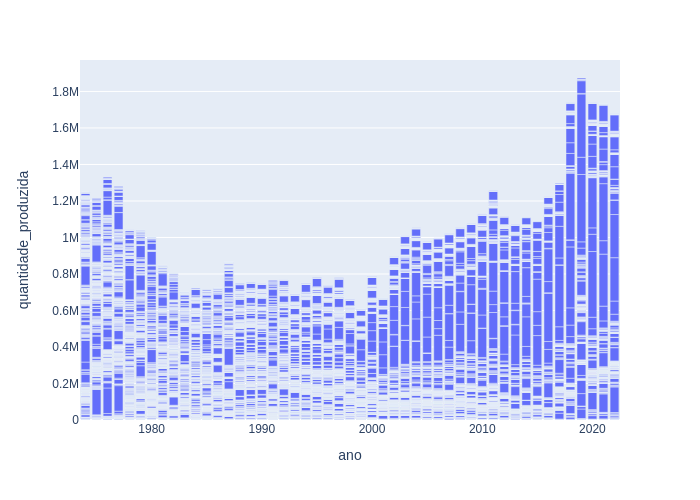

In [16]:
fig = px.bar(df, x='ano', y='quantidade_produzida')
fig.show('png')


In [17]:
df_filtro_ano = df[(df['ano'] >= 2012) & (df['ano'] <= 2022)]

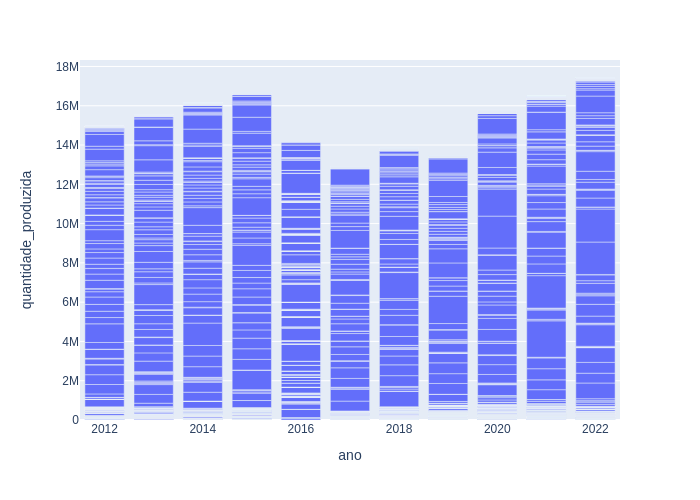

In [58]:
fig = px.bar(df_filtro_ano, x='ano', y='quantidade_produzida')
fig.show('png')

In [18]:
df_top10_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head(10).reset_index()
df_top10_produtos


,produto,quantidade_produzida
0,Banana (cacho),18941279.40
1,Manga,6746762.43
2,Uva,5947454.00
3,Laranja,5185026.00
4,Coco-da-baía*,3984176.00
5,Goiaba,3696930.60
6,Caju,3317744.00
7,Maracujá,352756.35
8,Algodão arbóreo (em caroço),342216.00
9,Mamão,278482.00


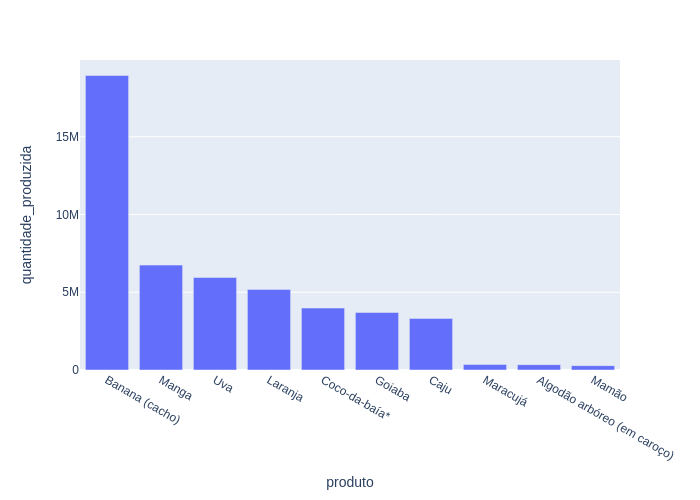

In [19]:
fig = px.bar(df_top10_produtos, x='produto', y='quantidade_produzida')
fig.show('png')

In [20]:
df_top5_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head().reset_index()
df_top5_produtos

,produto,quantidade_produzida
0,Banana (cacho),18941279.40
1,Manga,6746762.43
2,Uva,5947454.00
3,Laranja,5185026.00
4,Coco-da-baía*,3984176.00


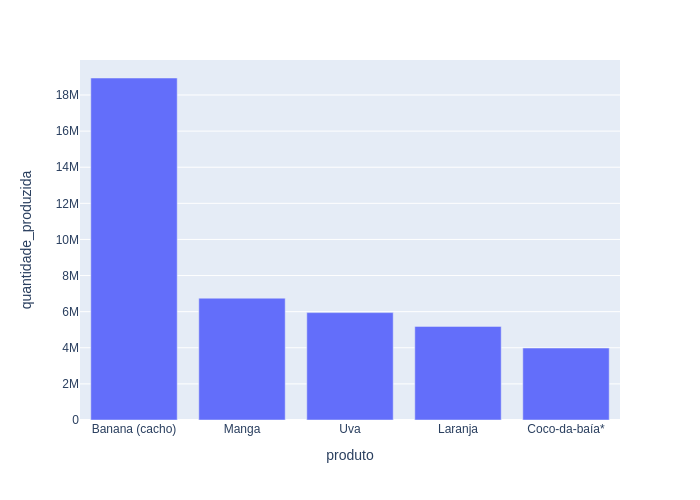

In [21]:
fig = px.bar(df_top5_produtos, x='produto', y='quantidade_produzida')
fig.show('png')

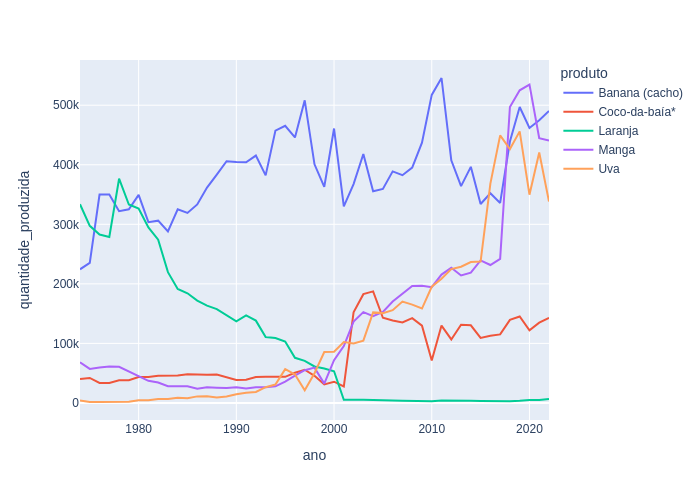

In [22]:
df_top5_produtos_por_ano = df[df['produto'].isin(df_top5_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()
fig = px.line(df_top5_produtos_por_ano, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


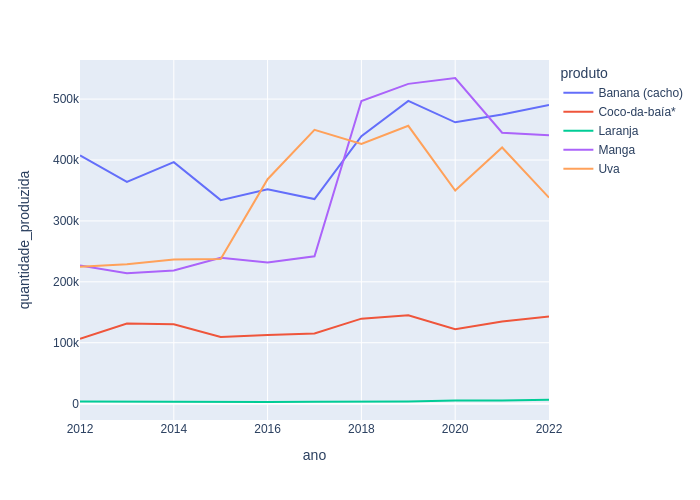

In [23]:
df_top5_produtos_por_ano_filtrado = df_top5_produtos_por_ano[(df_top5_produtos_por_ano['ano'] >= 2012) & (df_top5_produtos_por_ano['ano'] <= 2022)]
fig = px.line(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


In [24]:
df.corr()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
ano,1.000000,0.025309,-0.049351,0.053634,-0.228107,0.076161
area_destinada_colheita,0.025309,1.000000,0.985385,0.688498,0.021161,0.425263
area_colhida,-0.049351,0.985385,1.000000,0.391207,-0.057379,0.234628
quantidade_produzida,0.053634,0.688498,0.391207,1.000000,0.149483,0.759881
rendimento_medio_producao,-0.228107,0.021161,-0.057379,0.149483,1.000000,0.059354
valor_producao,0.076161,0.425263,0.234628,0.759881,0.059354,1.000000


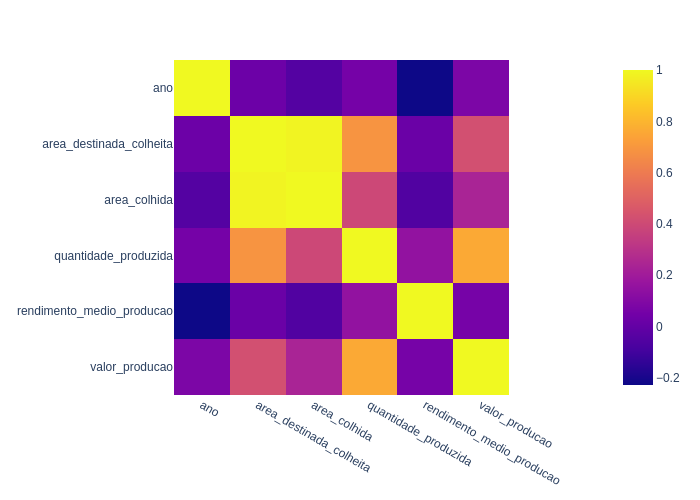

In [25]:
fig = px.imshow(df.corr())
fig.show('png')

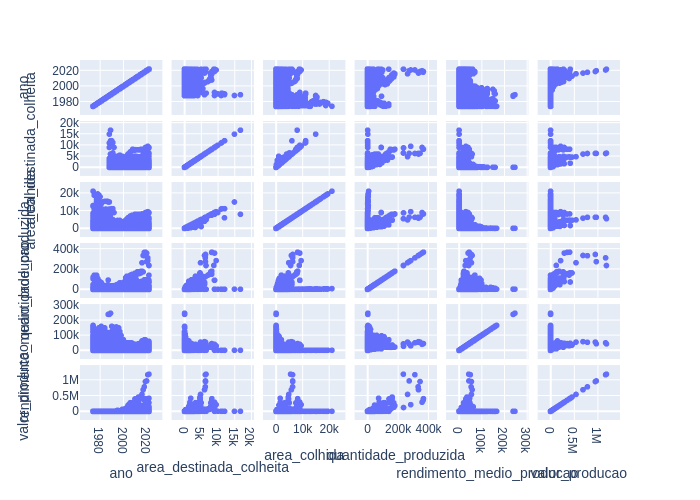

In [28]:
fig = px.scatter_matrix(df, dimensions=['ano', 'area_destinada_colheita', 'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao', 'valor_producao'])
fig.show('png')


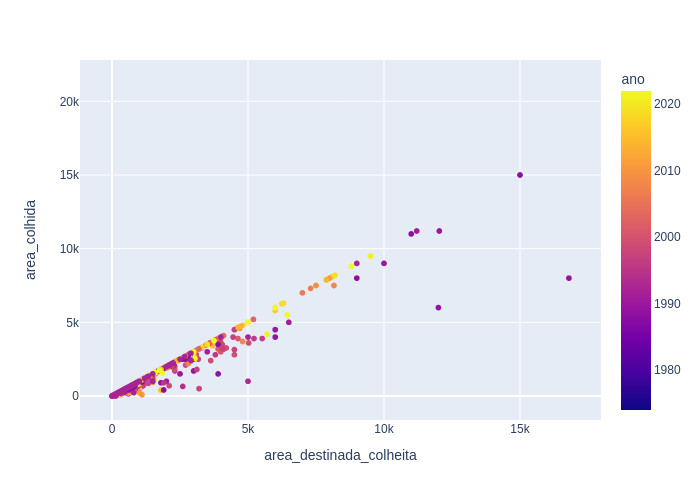

In [29]:
fig = px.scatter(df, x='area_destinada_colheita', y="area_colhida", color='ano')
fig.show('png')

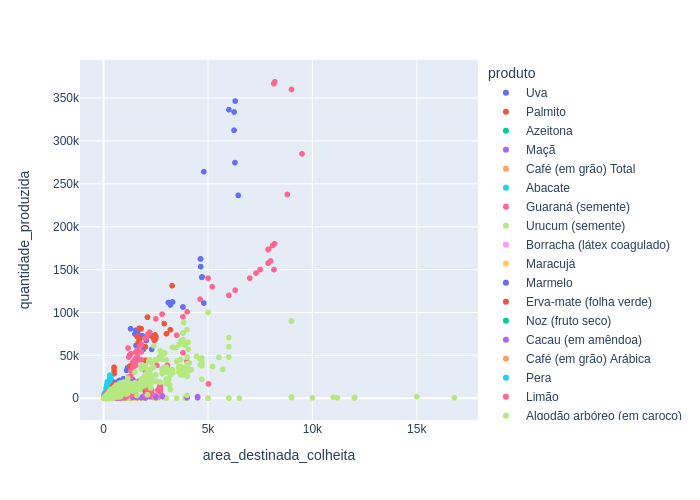

In [30]:
fig = px.scatter(df, x='area_destinada_colheita', y="quantidade_produzida", color='produto')
fig.show('png')

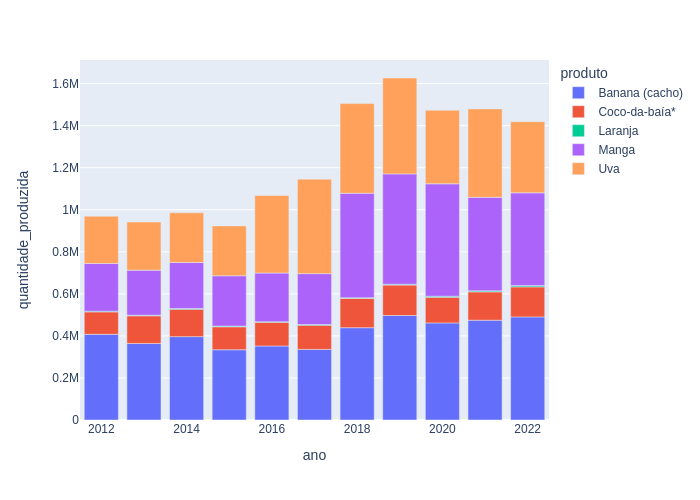

In [31]:
fig = px.bar(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


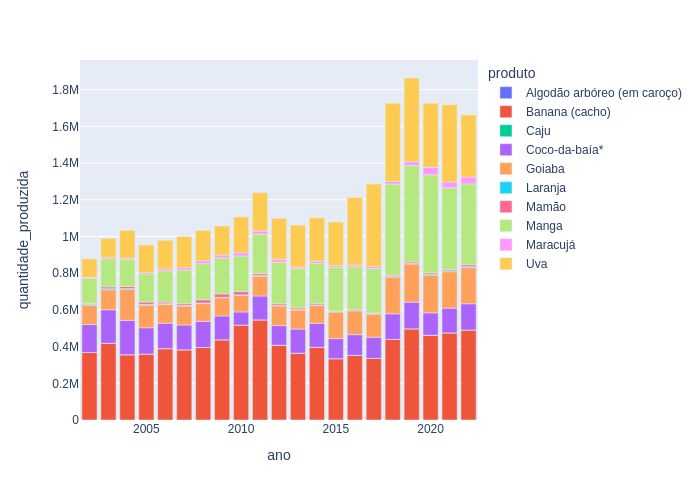

In [32]:
df_top10_produtos_por_ano = df[df['produto'].isin(df_top10_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()
df_top10_produtos_por_ano_filtrado = df_top10_produtos_por_ano[(df_top10_produtos_por_ano['ano'] >= 2002) & (df_top10_produtos_por_ano['ano'] <= 2022)]

fig = px.bar(df_top10_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida', color='produto')
fig.show('png')


In [33]:
df_area_por_ano = df[df['ano'] > 1987].groupby('ano')[['area_destinada_colheita', 'area_colhida']].sum().reset_index()
df_area_por_ano


,ano,area_destinada_colheita,area_colhida
0,1988,135298,129176
1,1989,135089,105539
2,1990,117799,111146
3,1991,106318,102338
4,1992,102394,98816
5,1993,87935,81016
6,1994,81024,76590
7,1995,79981,78732
8,1996,86429,79556
9,1997,93111,83853


In [34]:
percent_area_colhida = (df_area_por_ano['area_colhida'] / df_area_por_ano['area_destinada_colheita']) * 100
percent_area_colhida

,0
0,95.475173
1,78.125532
2,94.352244
3,96.256513
4,96.505655
5,92.131688
6,94.527547
7,98.438379
8,92.047808
9,90.057029


In [35]:
df_area_por_ano['percent_area_colhida'] = percent_area_colhida
df_area_por_ano


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
0,1988,135298,129176,95.475173
1,1989,135089,105539,78.125532
2,1990,117799,111146,94.352244
3,1991,106318,102338,96.256513
4,1992,102394,98816,96.505655
5,1993,87935,81016,92.131688
6,1994,81024,76590,94.527547
7,1995,79981,78732,98.438379
8,1996,86429,79556,92.047808
9,1997,93111,83853,90.057029


In [36]:
df_area_por_ano.sort_values('percent_area_colhida', ascending=True)


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
1,1989,135089,105539,78.125532
11,1999,89186,71698,80.391541
10,1998,88180,75600,85.733726
9,1997,93111,83853,90.057029
8,1996,86429,79556,92.047808
5,1993,87935,81016,92.131688
20,2008,100108,93415,93.314221
2,1990,117799,111146,94.352244
28,2016,76191,71933,94.411413
13,2001,78394,74024,94.425594


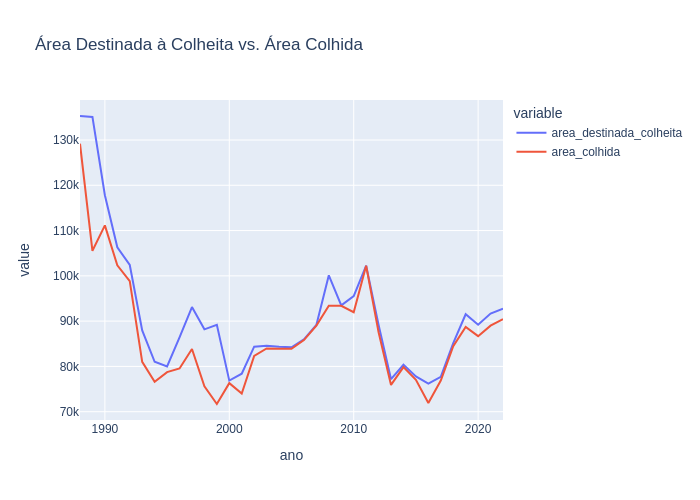

In [44]:
fig = px.line(df_area_por_ano, x='ano', y=['area_destinada_colheita', 'area_colhida'],
              title='Área Destinada à Colheita vs. Área Colhida')
fig.show('png')



In [37]:
rendimento_medio_por_ano = df.groupby('ano')['rendimento_medio_producao'].mean().reset_index()
rendimento_medio_por_ano

,ano,rendimento_medio_producao
0,1974,22093.547183
1,1975,19304.214201
2,1976,19312.986750
3,1977,18560.691255
4,1978,18754.129885
5,1979,19148.707040
6,1980,17863.831060
7,1981,16736.751804
8,1982,16478.275995
9,1983,14799.489262


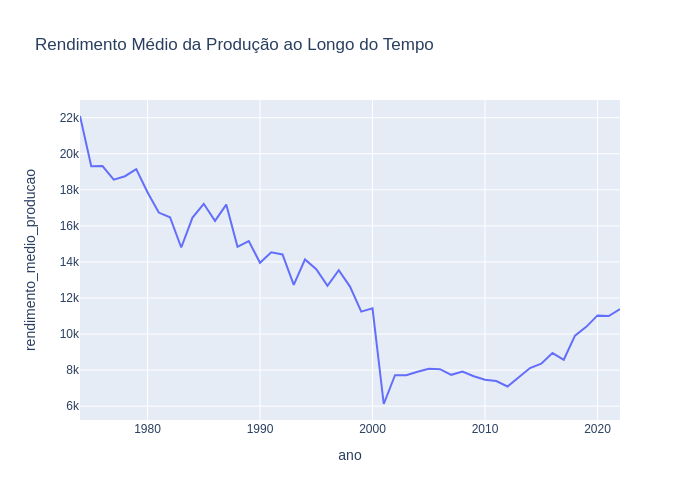

In [38]:
fig = px.line(rendimento_medio_por_ano, x='ano', y='rendimento_medio_producao',
              title='Rendimento Médio da Produção ao Longo do Tempo')
fig.show('png')

In [39]:
df_produtividade = df.groupby(['produto', 'ano'])['quantidade_produzida', 'area_colhida'].sum().reset_index()
df_produtividade['produtividade_media'] = (df_produtividade['quantidade_produzida'] / df_produtividade['area_colhida'])
df_produtividade


,produto,ano,quantidade_produzida,area_colhida,produtividade_media
0,Abacate,1974,14806.32,1456,10.169176
1,Abacate,1975,15246.36,1471,10.364623
2,Abacate,1976,14494.72,1474,9.833596
3,Abacate,1977,12523.28,1184,10.577095
4,Abacate,1978,10698.14,1097,9.752179
...,...,...,...,...,...
1857,Uva,2018,426392.00,8745,48.758376
1858,Uva,2019,456080.00,8806,51.79196
1859,Uva,2020,349757.00,8298,42.149554
1860,Uva,2021,420501.00,8838,47.578751


In [40]:
df_valor_producao = df.groupby(['produto', 'ano'])['valor_producao', 'quantidade_produzida'].sum().reset_index()


In [41]:
df_valor_producao.sort_values('valor_producao', ascending=False).head(20)

,produto,ano,valor_producao,quantidade_produzida
1861,Uva,2022,1712957.0,338206.0
1860,Uva,2021,1549239.0,420501.0
1859,Uva,2020,1252711.0,349757.0
1858,Uva,2019,1250585.0,456080.0
1857,Uva,2018,999254.0,426392.0
1856,Uva,2017,927162.0,449383.0
1855,Uva,2016,746579.0,368441.0
1852,Uva,2013,658460.0,228727.0
244,Banana (cacho),2022,633171.0,490440.0
1853,Uva,2014,590557.0,236719.0


In [42]:
rendimento_medio_por_produto = df.groupby(['produto', 'ano'])['rendimento_medio_producao'].mean().reset_index()
rendimento_medio_por_produto

,produto,ano,rendimento_medio_producao
0,Abacate,1974,11790.747474
1,Abacate,1975,11920.467661
2,Abacate,1976,10730.132566
3,Abacate,1977,10739.843500
4,Abacate,1978,10656.888888
...,...,...,...
1857,Uva,2018,32258.200000
1858,Uva,2019,34429.875000
1859,Uva,2020,28603.777778
1860,Uva,2021,33009.222222


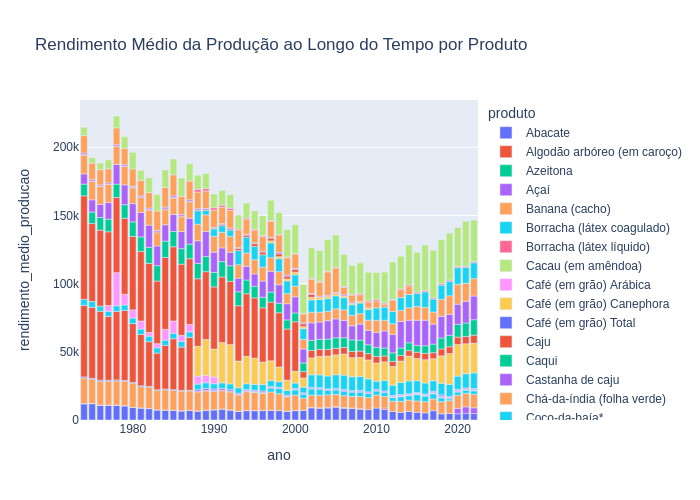

In [43]:
fig = px.bar(rendimento_medio_por_produto, x='ano', y='rendimento_medio_producao', color='produto',
              title='Rendimento Médio da Produção ao Longo do Tempo por Produto')
fig.show('png')